In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

df = pd.read_csv('../data_samples/data_jobs.csv')

# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']).dt.normalize()

def take_list(str_list):
    if pd.notna(str_list):
        return literal_eval(str_list)
    return str_list

df['job_skills'] = df['job_skills'].apply(take_list)

df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13,False,False,Singapore,NaN,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12,False,False,Malaysia,NaN,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12,False,False,Sudan,NaN,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [109]:
df_US = df[df['job_country'] == 'United States']

df_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07,False,False,United States,NaN,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27,False,False,United States,NaN,NaN,NaN,"Miracle Software Systems, Inc","[sql, python, java, sql server, gcp, bigquery,...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23,False,False,United States,NaN,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16,True,False,United States,NaN,NaN,NaN,JPMorgan Chase & Co.,NaN,NaN
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16,True,False,United States,NaN,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21,False,True,United States,year,157500.0,NaN,Tenet3,"[python, matlab, r]","{'programming': ['python', 'matlab', 'r']}"
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28,True,False,United States,NaN,NaN,NaN,Axelon Services Corporation,NaN,NaN


In [159]:
# Get the data analysis
df_US_DA = df_US[df_US['job_title_short'] == 'Data Analyst']

# Drop na
df_US_DA = df_US_DA.dropna(subset='salary_year_avg')

# Get the number of jobs count for data anaylsis
da_count = len(df_US_DA)

# Explode the skills
df_US_DA_exploded = df_US_DA.explode('job_skills')

# Get the payment for each skill
df_skills = df_US_DA_exploded.groupby('job_skills')['salary_year_avg'].agg(['median', 'size'])

# Rename the columns
df_skills = df_skills.rename(columns={'median': 'median_salary', 'size': 'skill_count'})

# Add the percentage
df_skills['likelihood'] = round((df_skills['skill_count'] / da_count)*100, 2)

# Sort by count
df_skills = df_skills.sort_values('skill_count', ascending=False)

# Take top optimal skills
df_skills = df_skills.iloc[:12]

df_skills

,median_salary,skill_count,likelihood
job_skills,,,
sql,91000.00,2508,57.66
excel,84392.00,1808,41.56
python,97500.00,1431,32.90
tableau,92875.00,1364,31.36
sas,90000.00,926,21.29
r,92500.00,893,20.53
power bi,90000.00,838,19.26
powerpoint,85000.00,462,10.62
word,81194.75,461,10.60


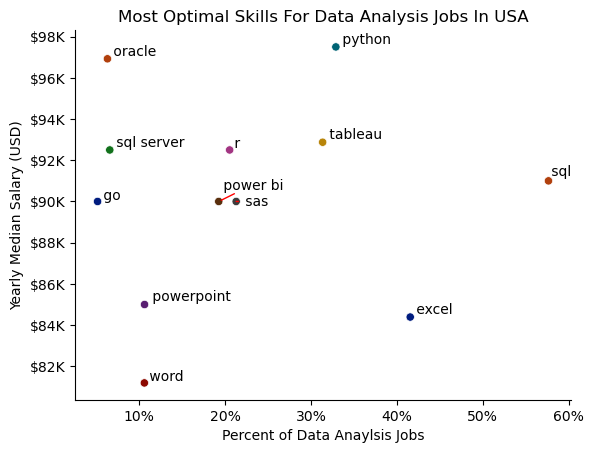

In [162]:
from adjustText import adjust_text

# Plot
ax = sns.scatterplot(data=df_skills, x='likelihood', y='median_salary', hue='likelihood', palette='dark', legend=False)

# Prepare the texts
txts = []

for i, skill in enumerate(df_skills.index):
    txts.append(ax.text(x=df_skills.loc[skill]['likelihood'], y=df_skills.loc[skill]['median_salary'], s=f' {skill}'))

adjust_text(txts, arrowprops=dict(arrowstyle="-", color='red', lw=1))

ax.set_title('Most Optimal Skills For Data Analysis Jobs In USA')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, _: f'${int(y/1000)}K'))
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
ax.set_ylabel('Yearly Median Salary (USD)')
ax.set_xlabel('Percent of Data Anaylsis Jobs')

sns.despine()

In [163]:
from ast import literal_eval

# Get the data analysis
df_US_DA = df_US[df_US['job_title_short'] == 'Data Analyst']

# Drop na
df_US_DA = df_US_DA.dropna(subset='salary_year_avg')

# Get the number of jobs count for data anaylsis
da_count = len(df_US_DA)

# Add one skill type of the skills type
df_US_DA['skill_type'] = df_US_DA['job_type_skills'].apply(lambda ty: pd.NA if pd.isna(ty) else ', '.join(list(literal_eval(ty).keys())))

df_US_DA_exploded = df_US_DA.explode('job_skills')

# Get the payment for each skill
df_skills = df_US_DA_exploded.groupby('job_skills')['salary_year_avg'].agg(['median', 'size'])

# Restore the skill as column
df_skills = df_skills.reset_index()

# Rename the columns
df_skills = df_skills.rename(columns={'median': 'median_salary', 'size': 'skill_count'})

# Add the percentage
df_skills['likelihood'] = round((df_skills['skill_count'] / da_count)*100, 2)

# Sort by count
df_skills = df_skills.sort_values('skill_count', ascending=False)

# Take top 10
df_skills = df_skills.iloc[:12]

# Add the type
types = []

for skill in df_skills['job_skills']:
    types.append(df_US_DA_exploded[df_US_DA_exploded['job_skills'] == skill].iloc[0]['skill_type'])

# Add the type
df_skills['skill_types'] = types

# Resturn the job title to index
df_skills = df_skills.set_index('job_skills')

df_skills

,median_salary,skill_count,likelihood,skill_types
job_skills,,,,
sql,91000.00,2508,57.66,"analyst_tools, programming"
excel,84392.00,1808,41.56,analyst_tools
python,97500.00,1431,32.90,"analyst_tools, programming"
tableau,92875.00,1364,31.36,"analyst_tools, programming"
sas,90000.00,926,21.29,"analyst_tools, programming"
r,92500.00,893,20.53,"analyst_tools, programming"
power bi,90000.00,838,19.26,"analyst_tools, programming"
powerpoint,85000.00,462,10.62,analyst_tools
word,81194.75,461,10.60,"analyst_tools, programming"


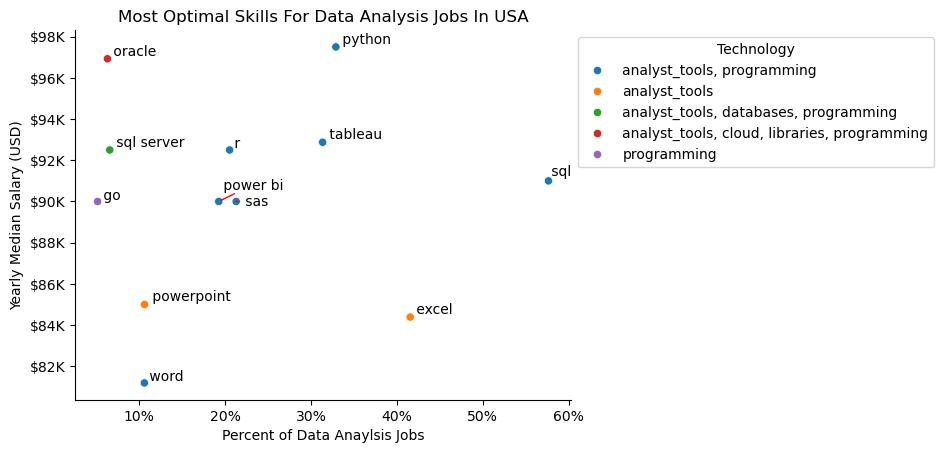

In [164]:
# It's time for plot
from adjustText import adjust_text

# Plot
ax = sns.scatterplot(data=df_skills, x='likelihood', y='median_salary', hue='skill_types')

# Move the legend out of the plot. Add title
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', title='Technology')

# Prepare the texts
txts = []

for i, skill in enumerate(df_skills.index):
    txts.append(ax.text(x=df_skills.loc[skill]['likelihood'], y=df_skills.loc[skill]['median_salary'], s=f' {skill}'))

adjust_text(txts, arrowprops=dict(arrowstyle="-", color='red', lw=1))

ax.set_title('Most Optimal Skills For Data Analysis Jobs In USA')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, _: f'${int(y/1000)}K'))
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
ax.set_ylabel('Yearly Median Salary (USD)')
ax.set_xlabel('Percent of Data Anaylsis Jobs')

sns.despine()
